In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
from rdkit import Chem
from rdkit.Chem import AllChem
import openpyxl

In [3]:
import os

In [4]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP + 'data/processed/'

In [5]:
df = pd.read_excel(raw_dir+'ICF_extractions_211223.xlsx', index_col=[0])
df.head()

,Status,Index,Substance Name in Assessment,Substance Number in Assessment,Substance Role,Read-Across Assessment Title,Year of Assessment,Link to Assessment,"Source (e.g. OECD IATA case study, U.S. EPA PPRTV, journal article, primary author, etc.)","Decision Context Purpose (e.g., regulatory, hazard screening, risk assessment, REACH, TSCA, test order, framework validation, etc.)",...,Other Toxicity Value,Other Toxicity Value units,Citation for Toxicity Value,Predicted Toxicity Type,Toxicological Endpoint Predicted by Read-Across,Predicted Endpoint Value,Predicted Endpoint Value Units,Method or Calculation Used to Derive Target Chemical Endpoint Value,Authors' Rationale for Choosing the Analogues/Category Justification,Analogue Evidence Stream
0,QC done,1,Chlorobenzene,1,Target,Case Study on the Use of Integrated Approaches...,2020.0,http://www.oecd.org/officialdocuments/publicdi...,OECD IATA case study,Case study to clarify regulatory acceptance an...,...,NaN,NaN,NaN,90-day oral,NOAEL,Not determined,NaN,A 90-day NOAEL for chlorobenzene could not be ...,The category members were selected for this st...,Structural_ChemMine-tools_MCS-Tanimoto | Physc...
1,QC done,1,"1,4-Dichlorobenzene",2,Target,Case Study on the Use of Integrated Approaches...,2020.0,http://www.oecd.org/officialdocuments/publicdi...,OECD IATA case study,Case study to clarify regulatory acceptance an...,...,NaN,NaN,NaN,90-day oral,NOAEL,7.8,mg/kg/day,"The NOAEL for 1,2,4-trichlorobenzene was appli...",The category members were selected for this st...,Structural_ChemMine-tools_MCS-Tanimoto | Physc...
2,QC done,1,"1,2-Dichlorobenzene",3,Category member,Case Study on the Use of Integrated Approaches...,2020.0,http://www.oecd.org/officialdocuments/publicdi...,OECD IATA case study,Case study to clarify regulatory acceptance an...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The category members were selected for this st...,Structural_ChemMine-tools_MCS-Tanimoto | Physc...
3,QC done,1,"1,3-Dichlorobenzene",4,Target,Case Study on the Use of Integrated Approaches...,2020.0,http://www.oecd.org/officialdocuments/publicdi...,OECD IATA case study,Case study to clarify regulatory acceptance an...,...,NaN,NaN,NaN,90-day oral,NOAEL,7.8,mg/kg/day,"The NOAEL for 1,2,4-trichlorobenzene was appli...",The category members were selected for this st...,Structural_ChemMine-tools_MCS-Tanimoto | Physc...
4,QC done,1,"1,2,4-Trichlorobenzene",5,Source Analogue,Case Study on the Use of Integrated Approaches...,2020.0,http://www.oecd.org/officialdocuments/publicdi...,OECD IATA case study,Case study to clarify regulatory acceptance an...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The category members were selected for this st...,Structural_ChemMine-tools_MCS-Tanimoto | Physc...


In [6]:
df['Approach \n(Analogue or Category)'].value_counts()

Approach \n(Analogue or Category)
Category             550
Analogue             132
Category/Analogue     51
Name: count, dtype: int64

In [7]:
df[df['Approach \n(Analogue or Category)'] == 'Analogue']['Source (e.g. OECD IATA case study,  U.S. EPA PPRTV, journal article, primary author, etc.)'].unique()

array(['Journal article', 'US EPA PPRTV',
       'OECD IATA case study (developed by EU ToxRisk project [BIAC])',
       'Health Canada screening assessment for the Challenge'],
      dtype=object)

In [8]:
df1= df[df['Approach \n(Analogue or Category)'] == 'Analogue']

In [9]:
df1['Substance Role'] = [e.strip() for e in df1['Substance Role']]

/tmp/ipykernel_1830607/2052842987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Substance Role'] = [e.strip() for e in df1['Substance Role']]


In [10]:
df1['Substance Role'] = df1['Substance Role'].replace('Source Analgoue','Source Analogue')

/tmp/ipykernel_1830607/2461384047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Substance Role'] = df1['Substance Role'].replace('Source Analgoue','Source Analogue')


In [11]:
df1['Substance Role'].unique()

array(['Target', 'Source Analogue', 'Candidate Analogue'], dtype=object)

In [14]:
rax_dict = {}
for i,group in df1.groupby(['Index']):
    subset = group[['Index','Substance Role', 'DTXSID', 'SMILES']]
    k = [e for e in subset['DTXSID']][0]
    v = [(a,b) for a,b in zip(subset['DTXSID'], subset['Substance Role']) if b != 'Target']
    v1 = [a[0] for a in v]
    rax_dict[k] = v1
    
    

In [15]:
rax_df = pd.DataFrame(list(rax_dict.items()), columns = ['target', 'analogue'])

In [16]:
rax_df = rax_df.explode('analogue')

In [17]:
rax_df.head()

,target,analogue
0,DTXSID0020232,DTXSID5021336
0,DTXSID0020232,DTXSID9026132
0,DTXSID0020232,DTXSID2052281
1,DTXSID8074312,DTXSID7024372
1,DTXSID8074312,DTXSID4020959


In [ ]:
df1[df1['Index'] ==2][['Substance Role', 'DTXSID']]

,Substance Role,DTXSID
12,Target,DTXSID0020232
13,Source Analogue,DTXSID5021336
14,Candidate Analogue,DTXSID9026132
15,Candidate Analogue,DTXSID2052281


In [18]:
my_smi = {k: v for k,v  in zip(df1['DTXSID'], df1['SMILES'])}

In [19]:
rax_df['target_smi'] = rax_df['target'].apply(lambda x: my_smi[x])

In [20]:
rax_df['analogue_smi'] = rax_df['analogue'].apply(lambda x: my_smi[x])

In [21]:
all_ids = list(set(df1['DTXSID']))

In [22]:
len(all_ids)

88

In [23]:
rax_cases = {}
for i,group in df1.groupby(['Index']):
    rax_cases[i] = list(group['DTXSID'])

In [24]:
#rax_cases

In [25]:
new_df = pd.DataFrame(index = all_ids, columns = all_ids)


In [26]:
new_df2 = new_df.copy()

In [27]:
cases = list(rax_cases.values())

In [28]:
#cases

In [29]:
def update_df(df):
    df1 = df.copy()
    for i in df1.index:
        for c in df1.columns:
            if i == c:
                df1.loc[i,c] =0
            elif any((i in sublist) and (c in sublist) for sublist in cases):
                df1.loc[i, c] =0
            else:
                df1.loc[i, c] = 1
    return df1

                


In [30]:
updated = update_df(new_df2)

In [31]:
updated

,DTXSID3042219,DTXSID0059746,DTXSID4025909,DTXSID5021336,DTXSID5024479,DTXSID80168576,DTXSID3024497,DTXSID7047221,DTXSID5024346,DTXSID3020207,...,DTXSID8074312,DTXSID6025355,DTXSID7020762,DTXSID3020833,DTXSID5039224,DTXSID5024051,DTXSID0028030,DTXSID0021917,DTXSID0020494,DTXSID6022472
DTXSID3042219,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DTXSID0059746,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DTXSID4025909,1,1,0,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
DTXSID5021336,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DTXSID5024479,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID5024051,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,0,1
DTXSID0028030,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
DTXSID0021917,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
DTXSID0020494,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,0,1


In [32]:
import numpy as np

In [33]:
def isSymmetric(mat, N):
    transmat = np.array(mat).transpose()
    if np.array_equal(mat, transmat):
        return True
    return False

In [34]:
isSymmetric(updated.values, 88)

True

In [35]:
def remove_upper_triangle(df):
    # Get the upper triangle mask
    mask = pd.DataFrame(np.triu(np.ones(df.shape), k=0), columns=df.columns, index=df.index)

    # Set upper triangle values to NaN
    df = df.where(mask == 0)

    return df

In [36]:
new_df3 = remove_upper_triangle(updated)

In [37]:
new_df3 =new_df3.unstack().reset_index().dropna()

In [38]:
new_df3

,level_0,level_1,0
1,DTXSID3042219,DTXSID0059746,1
2,DTXSID3042219,DTXSID4025909,1
3,DTXSID3042219,DTXSID5021336,1
4,DTXSID3042219,DTXSID5024479,1
5,DTXSID3042219,DTXSID80168576,1
...,...,...,...
7478,DTXSID0028030,DTXSID0020494,1
7479,DTXSID0028030,DTXSID6022472,1
7566,DTXSID0021917,DTXSID0020494,1
7567,DTXSID0021917,DTXSID6022472,1


In [39]:
new_df3.columns = ['Target', 'Analogue', 'Label']

In [40]:
new_df3 = new_df3[new_df3['Target'] != new_df3['Analogue']]

In [41]:
new_df3['Label'].value_counts()

Label
1    3667
0     161
Name: count, dtype: int64

In [42]:
new_df3['analogue_smi'] = new_df3['Analogue'].apply(lambda x: my_smi[x])
new_df3['target_smi'] = new_df3['Target'].apply(lambda x: my_smi[x])


In [43]:
from rdkit import DataStructs
from rdkit.Chem import AllChem

In [44]:
fpgen = AllChem.GetMorganGenerator(radius=3, fpSize=1024)

In [45]:
new_df3['analogue_mol'] = [Chem.MolFromSmiles(e) for e in new_df3['analogue_smi']]

new_df3['target_mol'] = [Chem.MolFromSmiles(e) for e in new_df3['target_smi']]


In [46]:
new_df3['fps_target'] = new_df3['target_mol'].apply(lambda x: fpgen.GetFingerprint(x))

In [47]:
new_df3['fps_analogue'] = new_df3['analogue_mol'].apply(lambda x: fpgen.GetFingerprint(x))

In [74]:
new_df3['fps_target'] = [np.array(AllChem.GetMorganFingerprintAsBitVect(i,3,1024)) for i in new_df3['target_mol']]

In [75]:
new_df3['fps_analogue'] = [np.array(AllChem.GetMorganFingerprintAsBitVect(i,3,1024)) for i in new_df3['analogue_mol']] 

In [76]:
similar_pairs = new_df3[new_df3['Label'] == 0]
dissimilar_pairs = new_df3[new_df3['Label'] == 1]

# Step 2: Downsample dissimilar pairs
downsampled_dissimilar_pairs = dissimilar_pairs.sample(n=len(similar_pairs), replace=False)

# Step 3: Combine balanced pairs
balanced_df = pd.concat([similar_pairs, downsampled_dissimilar_pairs])

# Step 4: Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42)

In [77]:
balanced_df['Label'].value_counts()

Label
1    161
0    161
Name: count, dtype: int64

In [112]:
balanced_df['Label'] = balanced_df['Label'].apply(lambda x: -1 if x==1 else 1)

In [85]:
#balanced_df['fps_target'].values.tolist()

In [56]:
from sklearn.model_selection import train_test_split


In [148]:
X_target = balanced_df['fps_target'].values.tolist()
X_analogue = balanced_df['fps_analogue'].values.tolist()
y = balanced_df['Label']

In [149]:
X_target_train, X_target_val, X_analogue_train, X_analogue_val, y_train, y_val = train_test_split(
    X_target, X_analogue, y, test_size=0.2, random_state=42
)


In [150]:
from sklearn.svm import SVC

In [151]:
model = SVC(kernel='rbf')

In [152]:
np.concatenate([X_target_train[0], X_analogue_train[0]])

array([0, 0, 0, ..., 0, 0, 1])

In [153]:
X_train = [(X_target_train[i]- X_analogue_train[i]) for i in range(len(X_target_train))]


In [154]:
#X_train

In [155]:
y_train = y_train.astype(int).values

In [156]:
model.fit(X_train, y_train)

SVC()

In [161]:
X_val = [(X_target_val[i] - X_analogue_val[i]) for i in range(len(X_target_val))]

In [162]:
from sklearn.metrics import accuracy_score

In [163]:
# Predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val.astype(int).values, y_pred)
print(f'Accuracy on validation set: {accuracy:.2f}')

Accuracy on validation set: 0.86


In [232]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score, make_scorer

In [218]:
X_target = balanced_df['fps_target'].values
X_analogue = balanced_df['fps_analogue'].values
y = balanced_df['Label'].values

In [214]:
mylst = []
for a,b in zip(X_target, X_analogue):
    mylst.append([a,b])


In [215]:
analogue_pairs = np.asarray(mylst).reshape(322,-1,1024)

In [251]:
from metric_learn import ITML

from sklearn.model_selection import cross_validate, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score, f1_score, make_scorer, roc_auc_score
from sklearn.model_selection import StratifiedKFold


In [252]:
y.shape

(322,)

In [253]:
indices = np.arange(1,balanced_df.shape[0]+1)
#indices

In [274]:
itml = ITML(random_state = 42)


In [275]:
pairs_train, pairs_test, y_train, y_test, idx1, idx2 = train_test_split(analogue_pairs, y, indices, test_size = 0.25, stratify=y, random_state = 42)

In [276]:
pairs_train.shape, pairs_test.shape, y_train.shape, y_test.shape

((241, 2, 1024), (81, 2, 1024), (241,), (81,))

In [277]:
baa = make_scorer(balanced_accuracy_score)

In [278]:
from sklearn.metrics import roc_auc_score

In [279]:
cv = StratifiedKFold(n_splits = 5)

In [280]:
result_itml = cross_validate(itml, pairs_train,  y_train, cv=cv, scoring = baa,return_train_score = True )

In [281]:
cv_results = pd.DataFrame(result_itml)

In [282]:
cv_results

,fit_time,score_time,test_score,train_score
0,4.807521,0.004544,0.680000,1.0
1,4.567953,0.004493,0.645833,1.0
2,4.245110,0.004497,0.708333,1.0
3,4.330333,0.004458,0.645833,1.0
4,4.340387,0.015861,0.666667,1.0


In [283]:
cv_results['test_score'].mean(), cv_results['test_score'].std()

(0.6693333333333333, 0.026203000252303585)

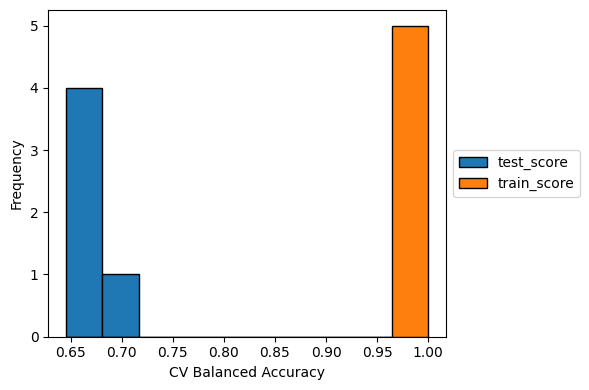

In [284]:
cv_results[['test_score', 'train_score']].plot.hist(edgecolor = 'black', figsize = (6,4))
plt.xlabel('CV Balanced Accuracy')
plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5))
plt.tight_layout()

In [326]:
def cv_run(gamma):
    a =cross_validate(ITML(random_state=42, gamma = gamma), pairs_train, y_train, cv=cv, scoring = make_scorer(balanced_accuracy_score), n_jobs=-1, return_estimator=True) 
    return a['test_score'].mean()

In [327]:
gammas = [0.25,0.5,0.75,1,5,10]
grid_search = []
for gamma in gammas:
    grid_search.append([gamma, cv_run(gamma)])

In [328]:
grid_search

[[0.25, 0.7683333333333333],
 [0.5, 0.7315],
 [0.75, 0.6901666666666667],
 [1, 0.6693333333333333],
 [5, 0.5493333333333332],
 [10, 0.5451666666666666]]

In [329]:
best_model = ITML(random_state=42, gamma = 0.25)

In [330]:
best_model.fit(pairs_train, y_train)

ITML(gamma=0.25, random_state=42)

In [331]:
y_pred = best_model.predict(pairs_test)

In [332]:
roc_auc_score(y_test, y_pred)

0.8503048780487804

In [333]:
balanced_accuracy_score(y_test, y_pred)

0.8503048780487805

In [334]:
from sklearn.metrics import confusion_matrix, classification_report

In [336]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.78      0.98      0.87        41
           1       0.97      0.72      0.83        40

    accuracy                           0.85        81
   macro avg       0.88      0.85      0.85        81
weighted avg       0.87      0.85      0.85        81



In [338]:
confusion_matrix(y_test, y_pred)

array([[40,  1],
       [11, 29]])

In [339]:
from sklearn.utils import shuffle

In [353]:
#pairs_test

In [340]:
perm_samples = []
for i in range(0,100):
    perm_samples.append([pairs_train, shuffle(y_train)] )


In [343]:
from time import time

In [354]:
start = time()

test_set = []
predictions_lst = []
for i in range(0,len(perm_samples)):
    z = perm_samples[i]
    a,b = z
    try:
        model =ITML(random_state = 42, gamma = 0.25)
        model.fit(a,b)
    except Exception as error:
        print(error)
    else:
        predictions_null= model.predict(a)
        ba = balanced_accuracy_score(b, predictions_null)
        predictions_lst.append([i, ba])
        testset_preds = model.predict(pairs_test)
        ba_test = balanced_accuracy_score(y_test, testset_preds)
        test_set.append([ba_test])
end = time()

report = end - start
print('%.3f seconds' % report)


573.826 seconds


array([[<Axes: title={'center': '0'}>]], dtype=object)

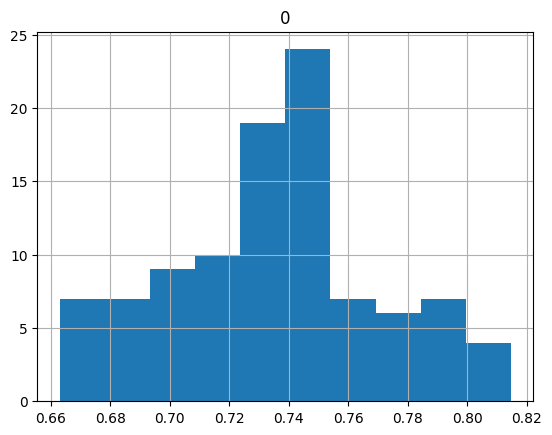

In [355]:
pd.DataFrame(test_set).hist()

In [365]:
pd.DataFrame(test_set).mean().values[0]

0.7352286585365853

In [358]:
#pd.DataFrame(predictions_lst)[1].hist()

In [350]:
pd.DataFrame(predictions_lst)[1].mean()

0.746547865013774

In [366]:
from scipy import stats

# Given data
observed_mean = pd.DataFrame(test_set).mean().values[0]
true_mean = 0.8503048780487805
observed_std =  pd.DataFrame(test_set).std().values[0]
sample_size =  100

# Calculate t-statistic
t_statistic = (observed_mean - true_mean) / (observed_std / np.sqrt(sample_size))

# Degrees of freedom
degrees_of_freedom = sample_size - 1

# Two-tailed t-test
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

# Chosen significance level (alpha)
alpha = 0.05

# Make a decision
if p_value < alpha:
    print(f"Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


Reject the null hypothesis. There is a significant difference.
